# MP3 Machine Learning FOR Analysis And Prediction

In [2]:
# Imports
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## 1. Data wrangling and exploration

In [3]:
# Load
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
# Check the shape of the DataFrame (rows, columns)
data.shape

(1470, 35)

In [5]:
# show all columns
pd.set_option("display.max_columns", None)

In [6]:
# Display the first 5 rows
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
# display the last 5 rows
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [9]:
# Check columns for null data
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
# Check for duplicated data
data.duplicated().sum()

np.int64(0)

In [11]:
# Check for negative values in numeric columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
(data[numeric_cols] < 0).any()

Age                         False
DailyRate                   False
DistanceFromHome            False
Education                   False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobSatisfaction             False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
YearsInCurrentRole          False
YearsSinceLastPromotion     False
YearsWithCurrManager        False
dtype: bool

In [12]:
# Check if all Over18 is always 'Y'
data['Over18'].value_counts()

Over18
Y    1470
Name: count, dtype: int64

In [13]:
# Double checking the Age column to check if everyone is over 18
(data['Age'] >= 18).all()

np.True_

### Exploration notes
There is a lot of different type of data; numeric, categorical, binary. So a mix of nominal and ordinal.

### Cleaning notes
We can see that some columns contains data that is constant, like StandardHours is always 80 and EmployeeCount is always 1 and Over18 is always 'Y'. Lastly EmployeeNumber is an identifier which is a useless feature, we already use indices for the dataframe. So we could consider dropping these columns.

In [14]:
# Drop useless columns in a new dataframe
data1 = data.copy()
data1 = data1.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'], axis=1)

In [15]:
# Check if columns were dropped correctly
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

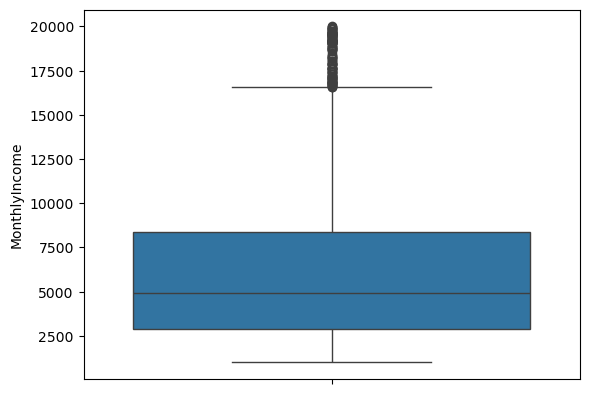

In [16]:
# Boxplot for monthly income
sns.boxplot(y='MonthlyIncome', data=data1)
plt.show()

In [17]:
# Label encoding for binary data
binary_mapping = {'Yes': 1, 'No': 0, 'Y': 1, 'N': 0}
data1['Attrition'] = data1['Attrition'].map(binary_mapping)
data1['OverTime'] = data1['OverTime'].map(binary_mapping)
data1['Gender'] = data1['Gender'].map({'Male': 1, 'Female': 0})

In [18]:
# Check if label encoding was successful
cols = ['Attrition', 'OverTime', 'Gender']
data1[cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Attrition  1470 non-null   int64
 1   OverTime   1470 non-null   int64
 2   Gender     1470 non-null   int64
dtypes: int64(3)
memory usage: 34.6 KB


In [19]:
# One-hot encoding
data1 = pd.get_dummies(data1, columns=['BusinessTravel','Department','JobRole','EducationField','MaritalStatus'], drop_first=True)

In [20]:
# Check new dataframe
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   Gender                             1470 non-null   int64
 7   HourlyRate                         1470 non-null   int64
 8   JobInvolvement                     1470 non-null   int64
 9   JobLevel                           1470 non-null   int64
 10  JobSatisfaction                    1470 non-null   int64
 11  MonthlyIncome                      1470 non-null   int64
 12  MonthlyRate         

In [21]:
# Check new dataframe
data1.head(5)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,False,True,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True
1,49,0,279,8,1,3,1,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,True,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False
2,37,1,1373,2,2,4,1,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True
3,33,0,1392,3,4,4,0,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,True,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False
4,27,0,591,2,1,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,False,True,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False


## 2. Predict monthly income

If we want to predict monthly income, the MonthlyIncome is our dependent variable. The y in our linear function.

### Correlation

In [22]:
# Correlation matrix
corr_matrix = data1.corr(numeric_only=True)

# Sort correlations with MonthlyIncome
income_corr = corr_matrix['MonthlyIncome'].sort_values(ascending=False)
print(income_corr)

MonthlyIncome                        1.000000
JobLevel                             0.950300
TotalWorkingYears                    0.772893
JobRole_Manager                      0.619573
YearsAtCompany                       0.514285
Age                                  0.497855
JobRole_Research Director            0.485818
YearsInCurrentRole                   0.363818
YearsSinceLastPromotion              0.344978
YearsWithCurrManager                 0.344079
NumCompaniesWorked                   0.149515
Education                            0.094961
Department_Sales                     0.063978
EducationField_Marketing             0.062576
MaritalStatus_Married                0.056767
JobRole_Manufacturing Director       0.055684
JobRole_Sales Executive              0.047792
BusinessTravel_Travel_Rarely         0.038779
MonthlyRate                          0.034814
WorkLifeBalance                      0.030683
RelationshipSatisfaction             0.025873
DailyRate                         

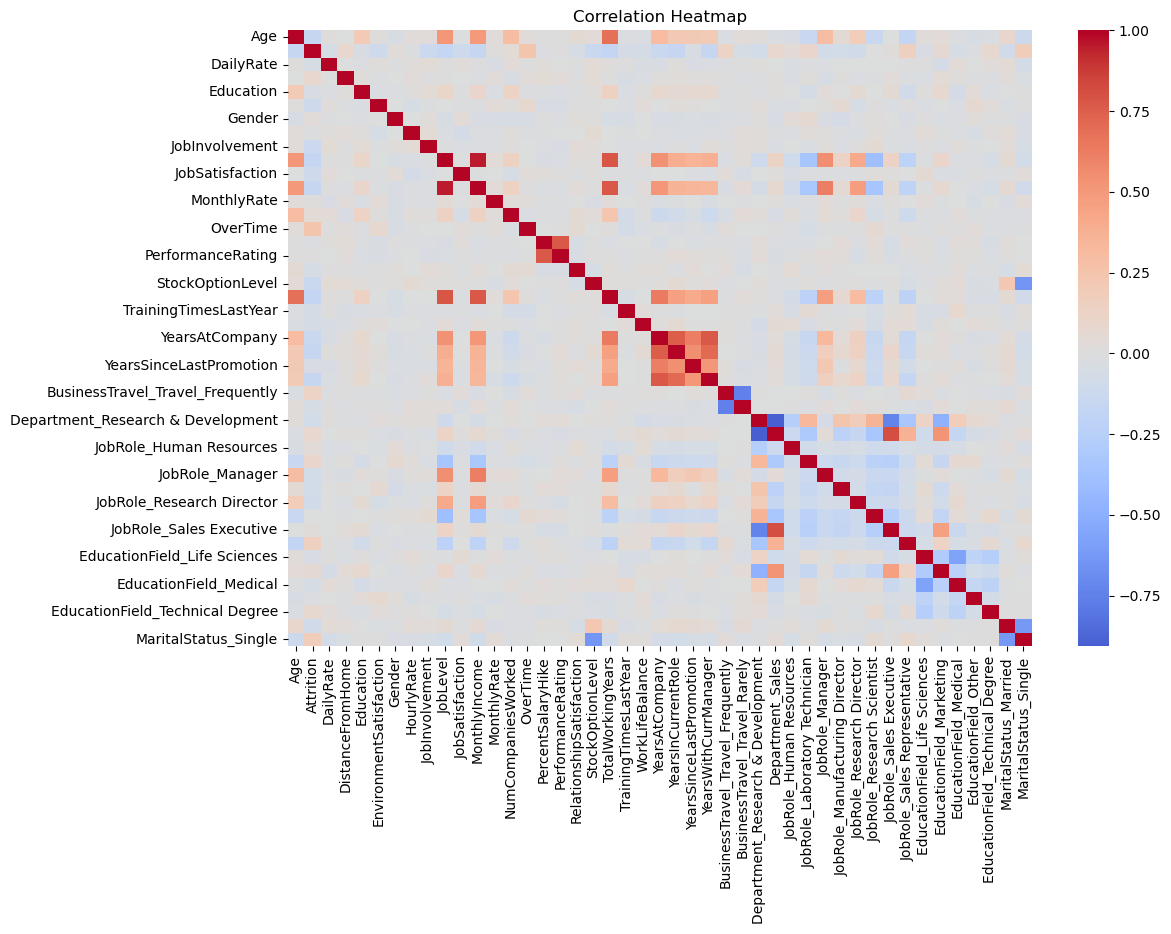

In [23]:
# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

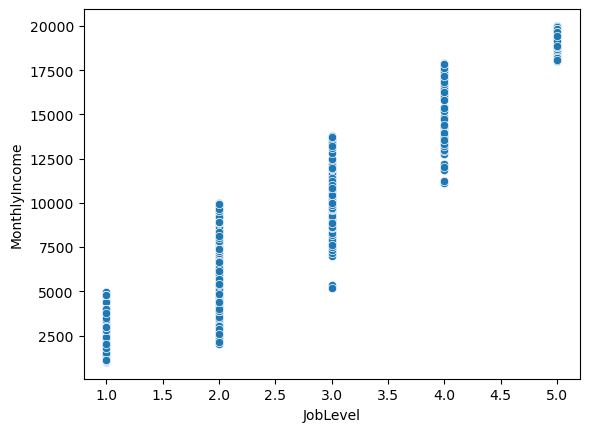

In [24]:
# Focused scatterplots for top correlations
sns.scatterplot(x='JobLevel', y='MonthlyIncome', data=data1)
plt.show()

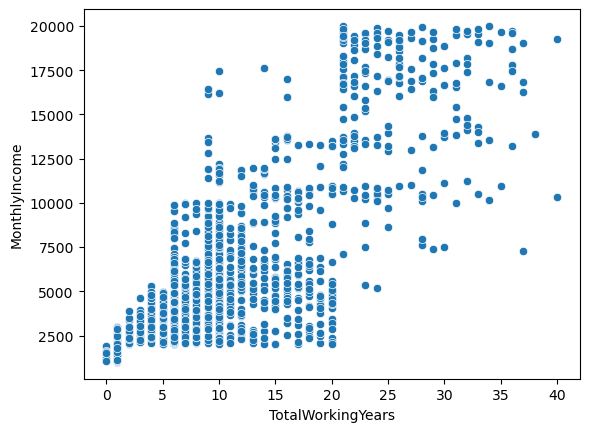

In [25]:
# Focused scatterplots for top correlations
sns.scatterplot(x='TotalWorkingYears', y='MonthlyIncome', data=data1)
plt.show()

In [26]:
# Print the total number of each gender, females are 0, males are 1
print(data1['Gender'].value_counts())

Gender
1    882
0    588
Name: count, dtype: int64


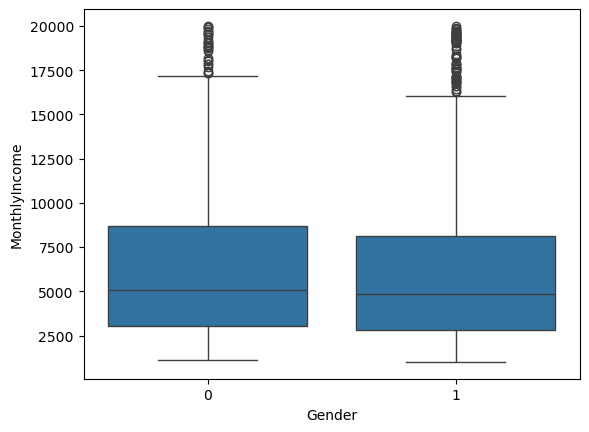

In [ ]:
# Boxplot for gender and monthly income, 1 = male and 0 = female
sns.boxplot(x='Gender', y='MonthlyIncome', data=data1)
plt.show()

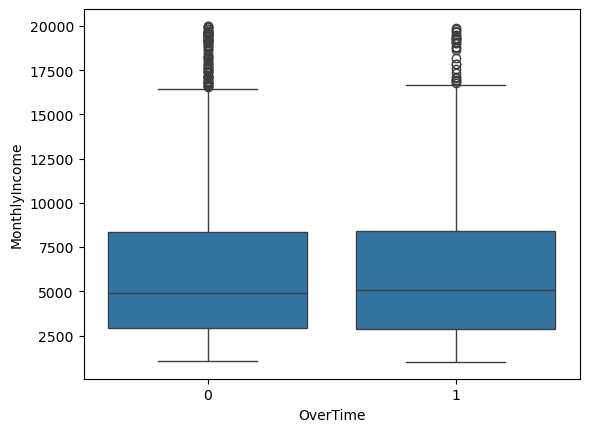

In [28]:
# Boxplot for overtime and monthly income, Yes = 1 and No = 0
sns.boxplot(x='OverTime', y='MonthlyIncome', data=data1)
plt.show()

## Train-Test Split

In [29]:
# independent
X = data1['JobLevel'].values.reshape(-1, 1) # Uppercase X because we could have multiple columns of X values
# dependent
y = data1['MonthlyIncome'].values.reshape(-1, 1)
# We want to predict the monthly income based on the job level, so the predict = dependent, the measured = independent

In [30]:
y

array([[5993],
       [5130],
       [2090],
       ...,
       [6142],
       [5390],
       [4404]])

In [32]:
sns.lmplot(x='JobLevel',y='MonthlyIncome',data=data1,fit_reg=True) 

In [33]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.15) # random_state is like a seed for random generation

In [34]:
# the shape of the subsets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1249, 1)
(1249, 1)
(221, 1)
(221, 1)


## Train the ML Model

In [35]:
# creating an instance of Linear Regression model
myreg = LinearRegression()

In [36]:
# fit it to our data
myreg.fit(X_train, y_train)
myreg

LinearRegression()

In [37]:
# get the calculated coefficients
a = myreg.coef_
b = myreg.intercept_

In [38]:
a

array([[4004.17115665]])

In [39]:
b

array([-1766.77700272])

In [40]:
print(f"The model is a line, y = a * x + b, or y = {a} * x + {b}")

The model is a line, y = a * x + b, or y = [[4004.17115665]] * x + [-1766.77700272]


## Test the Models

### Test with the Test Data

In [41]:
y_predicted = myreg.predict(X_test)
y_predicted

array([[ 2237.39415393],
       [ 6241.56531058],
       [ 6241.56531058],
       [ 2237.39415393],
       [ 2237.39415393],
       [ 2237.39415393],
       [ 2237.39415393],
       [ 2237.39415393],
       [ 6241.56531058],
       [ 6241.56531058],
       [ 2237.39415393],
       [ 6241.56531058],
       [ 6241.56531058],
       [ 6241.56531058],
       [10245.73646723],
       [10245.73646723],
       [14249.90762388],
       [ 2237.39415393],
       [ 6241.56531058],
       [ 6241.56531058],
       [14249.90762388],
       [18254.07878053],
       [10245.73646723],
       [10245.73646723],
       [ 2237.39415393],
       [ 6241.56531058],
       [ 2237.39415393],
       [10245.73646723],
       [14249.90762388],
       [ 2237.39415393],
       [18254.07878053],
       [ 6241.56531058],
       [10245.73646723],
       [ 2237.39415393],
       [ 6241.56531058],
       [14249.90762388],
       [ 6241.56531058],
       [ 2237.39415393],
       [ 2237.39415393],
       [ 2237.39415393],


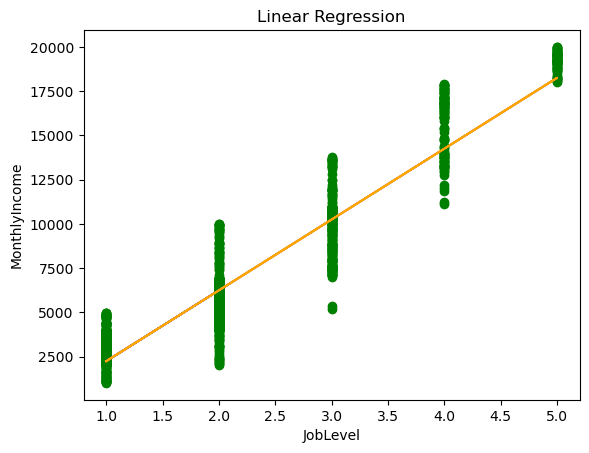

In [57]:
# Visualise the Linear Regression 
plt.title('Linear Regression')
plt.scatter(X, y, color='green')
plt.plot(X_train, a*X_train + b, color='blue')
plt.plot(X_test, y_predicted, color='orange')
plt.xlabel('JobLevel')
plt.ylabel('MonthlyIncome')
plt.show()

In [43]:
# Predict the Monthly income by Job level
monthly_income_predicted = myreg.predict([[3]])
monthly_income_predicted

array([[10245.73646723]])

In [44]:
# Test by inputting into formular
monthly_income_predicted = a * 3 + b
monthly_income_predicted

array([[10245.73646723]])

## Predict unknown data

In [45]:
# Assume a employee
job_level = 5
monthly_income_predicted = myreg.predict([[job_level]])
monthly_income_predicted

array([[18254.07878053]])

## Step 6: Model Evaluation 

We need evaluation metrics designed for comparing continuous values.

The **three common evaluation metrics** for regression problems:

- **Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

- **Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

- **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [46]:
# MAE
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_predicted)
print(mae)

1251.8001823330633


In [47]:
# MSE
mse = metrics.mean_squared_error(y_test, y_predicted)
print(mse)

2667898.9447026155


In [48]:
# RMSE
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predicted))
print(rmse)

1633.3704248279432


## Evaluation notes
On average our model will get the monthly income wrong by 1251 dollars. Taking into account the larger errors it will be 1633 dollars.

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error, measured in the same units like the data
- **MSE** is more popular than MAE, because MSE amplifies larger errors, making it useful when larger errors are particularly costly
- **RMSE** is even more popular than MSE, because RMSE combines the benefits of both MSE and MAE

### Calculate R-squared

In [49]:
# Explained variance score: the proportion of the variance in a dependent variable that can be explained by the model
# 1 for perfect prediction
eV = round(sm.explained_variance_score(y_test, y_predicted), 2)
print('Explained variance score ',eV )

Explained variance score  0.89


In [50]:
# R-squared: the proportion of the variation in the dependent variable that is predictable from the independent variable(s)
from sklearn.metrics import r2_score
#r2_score(y, predict(X))
r2_score(y_test, y_predicted)

0.8912951210956628

# 3. Predict employee Attrition

Attrition is the value that measures wether an employee has left the company or not, in the original dataset it was measured as 'Yes' or 'No'. When it was transformed to numeric it became 1 or 0 respectively. So 1 = Left the job and 0 = Still employeed

### Correlation between attrition

In [51]:
# Correlation matrix
corr_matrix1 = data1.corr(numeric_only=True)

# Sort correlations with Attrition
attrition_corr = corr_matrix1['Attrition'].sort_values(ascending=False)
print(attrition_corr)

Attrition                            1.000000
OverTime                             0.246118
MaritalStatus_Single                 0.175419
JobRole_Sales Representative         0.157234
BusinessTravel_Travel_Frequently     0.115143
JobRole_Laboratory Technician        0.098290
Department_Sales                     0.080855
DistanceFromHome                     0.077924
EducationField_Technical Degree      0.069355
EducationField_Marketing             0.055781
NumCompaniesWorked                   0.043494
JobRole_Human Resources              0.036215
Gender                               0.029453
JobRole_Sales Executive              0.019774
MonthlyRate                          0.015170
PerformanceRating                    0.002889
JobRole_Research Scientist          -0.000360
HourlyRate                          -0.006846
PercentSalaryHike                   -0.013478
EducationField_Other                -0.017898
Education                           -0.031373
EducationField_Life Sciences      

None of the values have a high correlation with attrition individually, so it's most likely a combination of multiply factors. The strongest posetive correlations are OverTime, MaritalStatus_Single, JobRole_Sales Rep and the strongest negative correlations are YearsInCurrentRole, JobLevel, TotalWorkingYears, Age, MonthlyIncome.

In [52]:
# Correlation matrix
corr_matrix2 = data1.corr(numeric_only=True)

# Sort correlations with JobSatisfaction
jobsat_corr = corr_matrix2['JobSatisfaction'].sort_values(ascending=False)
print(jobsat_corr)

JobSatisfaction                      1.000000
EducationField_Life Sciences         0.052004
Gender                               0.033252
DailyRate                            0.030571
BusinessTravel_Travel_Frequently     0.027117
MaritalStatus_Single                 0.024571
OverTime                             0.024539
JobRole_Research Scientist           0.020503
PercentSalaryHike                    0.020002
Department_Sales                     0.013499
JobRole_Sales Executive              0.012604
StockOptionLevel                     0.010690
EducationField_Other                 0.003380
PerformanceRating                    0.002297
JobRole_Sales Representative         0.001413
MonthlyRate                          0.000644
JobLevel                            -0.001944
YearsInCurrentRole                  -0.002305
Department_Research & Development   -0.002798
DistanceFromHome                    -0.003669
YearsAtCompany                      -0.003803
Age                               

We can also see that there is no correlation between JobSatisfaction and any other value, but we would assume that employees who are unsatisfied with their job would quit.

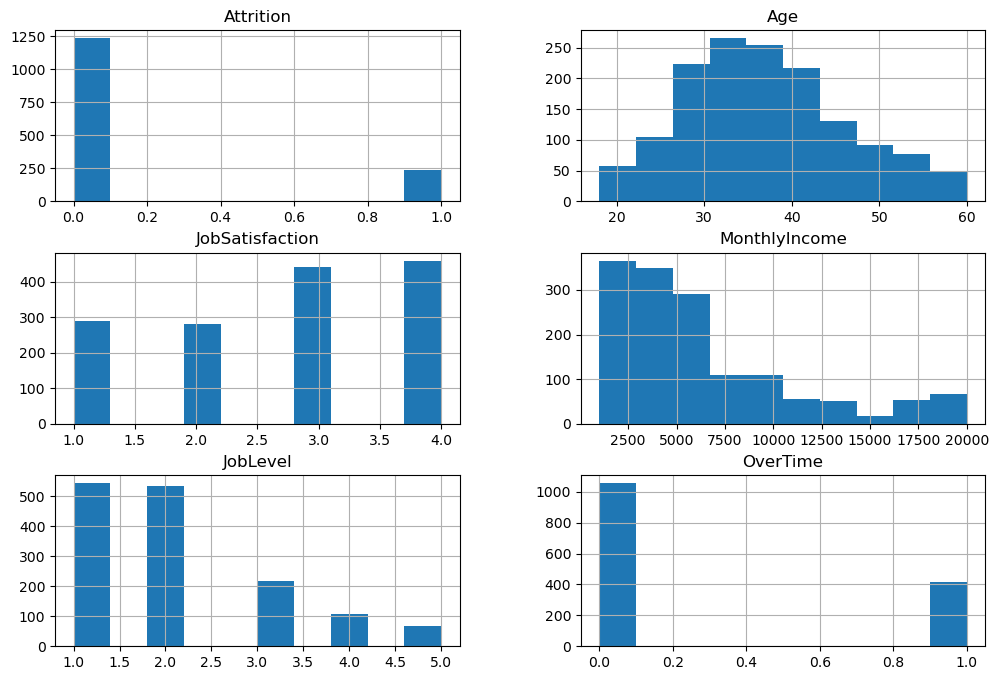

In [53]:
# Exploration of data
data1[['Attrition','Age','JobSatisfaction', 'MonthlyIncome', 'JobLevel', 'OverTime']].hist(figsize=(12,8))
plt.show()

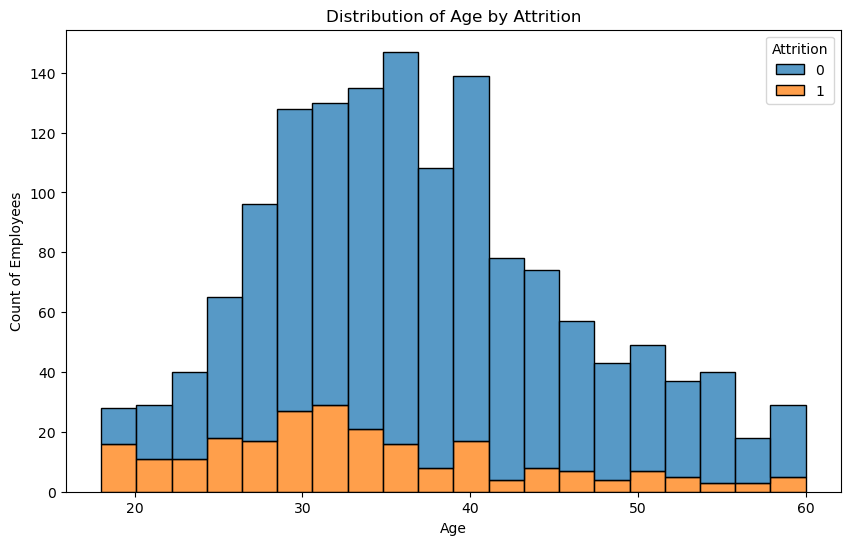

In [66]:
# Attrition & Age exploration
plt.figure(figsize=(10,6))
sns.histplot(data=data1, x='Age', hue='Attrition', multiple='stack', bins=20)

plt.title("Distribution of Age by Attrition")
plt.xlabel("Age")
plt.ylabel("Count of Employees")
plt.show()

We can see from this diagram that there are clearly a lot of younger employees that are more likely to quit.

In [54]:
# Target column
y_att = data1['Attrition']
# Feature columns (drop the target)
X_att = data1.drop('Attrition', axis=1)

In [55]:
# Normalization, Transform each feature to be between 0 and 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_att)

In [56]:
# Convert back to a dataframe
X_scaled_df = pd.DataFrame(X_scaled, columns=X_att.columns)
# Check first 5 rows
print(X_scaled_df.head())

        Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0  0.547619   0.715820          0.000000       0.25                 0.333333   
1  0.738095   0.126700          0.250000       0.00                 0.666667   
2  0.452381   0.909807          0.035714       0.25                 1.000000   
3  0.357143   0.923407          0.071429       0.75                 1.000000   
4  0.214286   0.350036          0.035714       0.00                 0.000000   

   Gender  HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  \
0     0.0    0.914286        0.666667      0.25         1.000000   
1     1.0    0.442857        0.333333      0.25         0.333333   
2     1.0    0.885714        0.333333      0.00         0.666667   
3     0.0    0.371429        0.666667      0.00         0.666667   
4     1.0    0.142857        0.666667      0.00         0.333333   

   MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
0       0.262454     0.698053            0.8888

## Train a Model

### Multiple Linear Regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

In this case:

$y = \beta_0 + \beta_1 \times {variable1} + \beta_2 \times {variable2} + \beta_3 \times {variable3}$

The $\beta$ values are called the **model coefficients**. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

### Preparing X and y 

- scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
- However, pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series!

In [92]:
data1.head(5)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,False,True,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True
1,49,0,279,8,1,3,1,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,True,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False
2,37,1,1373,2,2,4,1,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True
3,33,0,1392,3,4,4,0,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,True,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False
4,27,0,591,2,1,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,False,True,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False


In [70]:
# create a Python list of feature names
feature_cols = ['Age', 'JobSatisfaction', 'OverTime']

# use the list to select a subset of the original DataFrame
X = data1[feature_cols]

# print the first 5 rows
X.head()

,Age,JobSatisfaction,OverTime
0,41,4,1
1,49,2,0
2,37,3,1
3,33,3,1
4,27,2,0


In [71]:
# select a Series from the DataFrame for y
y = data1['Attrition']

# print the first 5 values
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [72]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(1470, 3)


In [73]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(1470,)


### Splitting X and y into Training and Testing Sets

In [74]:
# Training set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [75]:
# default split 75:25
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1102, 3)
(1102,)
(368, 3)
(368,)


In [76]:
y_test.head()

1291    1
1153    1
720     1
763     0
976     0
Name: Attrition, dtype: int64

In [77]:
X_test.head()

,Age,JobSatisfaction,OverTime
1291,37,1,0
1153,18,4,1
720,30,3,1
763,34,3,1
976,56,2,1


### Linear Regression by scikit-learn

In [78]:
# create a model
linreg = LinearRegression()

# fit the model to our training data
linreg.fit(X_train, y_train)

LinearRegression()

In [79]:
# the intercept and coefficients are stored in system variables
print('b0 =', linreg.intercept_)
print('bi =', linreg.coef_)

b0 = 0.38017290745783505
bi = [-0.00573965 -0.02546051  0.1996626 ]


In [80]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('Age', np.float64(-0.0057396455598402694)),
 ('JobSatisfaction', np.float64(-0.025460514286852004)),
 ('OverTime', np.float64(0.1996625950217197))]

The result of the model fitting shows how the Attrition depend on multiple factors:
$$y = 0.3802 + -0.0057 \times Age + -0.0255 \times JobSatisfaction + 0.1997 \times OverTime$$

## Testing the Model

In [81]:
# make predictions on the testing set
y_predicted = linreg.predict(X_test)

In [82]:
y_predicted

array([ 1.42345507e-01,  3.74679825e-01,  3.31264593e-01,  3.08306011e-01,
        2.07494323e-01,  1.66039871e-01,  3.30528811e-01, -1.43910732e-02,
        7.17036102e-02,  1.23360420e-01, -3.16100099e-02,  3.14045656e-01,
        3.50985462e-01,  1.65304090e-01,  1.23360420e-01,  2.68128492e-01,
        8.56848333e-02,  3.54223175e-01,  2.16960900e-01,  1.31601998e-01,
        8.56848333e-02,  2.82845496e-01,  3.65299553e-02,  3.53487394e-01,
        1.60300226e-01,  9.64283430e-02,  3.59962821e-01,  7.74432557e-02,
        1.19386925e-01,  1.40579357e-01,  1.94002317e-01,  2.31188686e-01,
        2.11221254e-01,  2.82845496e-01,  2.73868137e-01,  2.10732036e-01,
        1.88262672e-01,  1.14383061e-01,  1.34103930e-01,  3.11543724e-01,
        2.56649201e-01,  2.44434128e-01, -3.16100099e-02,  1.51322867e-01,
        3.32922418e-02,  1.25862352e-01,  3.54223175e-01,  3.47747748e-01,
        8.31829013e-02,  9.06886974e-02,  2.25487322e-02,  1.60300226e-01,
        2.96090938e-01,  

## Model Evaluation Metrics

Instead, we need evaluation metrics designed for comparing continuous values.

The **three common evaluation metrics** for regression problems are:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [84]:
print(metrics.mean_absolute_error(y_test, y_predicted))

0.2573647027736243


**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [85]:
# calculate MSE using scikit-learn
print(metrics.mean_squared_error(y_test, y_predicted))

0.13169157237558557


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [86]:
# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

0.36289333470812823


Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

### R-squared

In [87]:
# Explained variance (1 would be the best prediction)
eV = round(sm.explained_variance_score(y_test, y_predicted), 2)
print('Explained variance score ',eV )

Explained variance score  0.13


In [88]:
# R-squared
r2_score(y_test, y_predicted)

0.12577453444160303

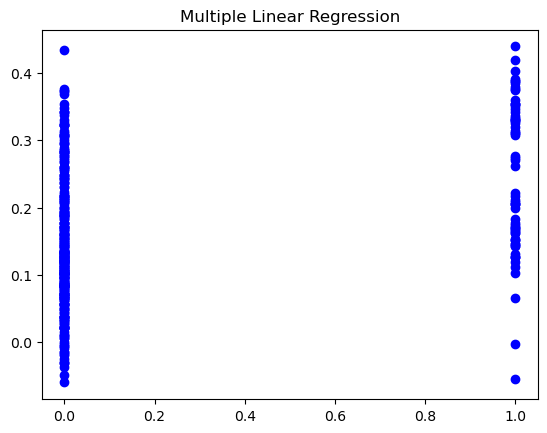

In [89]:
# Visualise the regression results
plt.title('Multiple Linear Regression')
plt.scatter(y_test, y_predicted, color='blue')
plt.show()

### TODO: Det her er forkert, brug en anden model!